In [1]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [4]:
'''
Pre-processing input samples
1) Convert data format storage files as jpg to rgb.
2) Vectorize rgb file as tensor that entry type is float.
3) Standardize entries.

keras.preprocessing.image module has helpers which pre-process input images.
'''

from keras.preprocessing.image import ImageDataGenerator
import os

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

dataset_dir = '/home/guhwanbae/workspace/machine-learning/resource/cats-and-dogs-small'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

# train directory has cats and dogs directory.
# flow_from_directory procedure set dogs a target class.
# model's output is a probability that input image is a dog.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
'''
train_generator make a batch which contains 20 samples.
fit_generator procedure call train_generator 100 times to process 2000 samples in train dataset.
'''

history = model.fit_generator(train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 8s 85ms/step - loss: 0.6895 - acc: 0.5485 - val_loss: 0.6788 - val_acc: 0.5080
Epoch 2/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6654 - acc: 0.6080 - val_loss: 0.6450 - val_acc: 0.6290
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6149 - acc: 0.6735 - val_loss: 0.5967 - val_acc: 0.6640
Epoch 4/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5729 - acc: 0.7010 - val_loss: 0.6532 - val_acc: 0.6270
Epoch 5/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5446 - acc: 0.7260 - val_loss: 0.5908 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5130 - acc: 0.7520 - val_loss: 0.6299 - val_acc: 0.6660
Epoch 7/30
100/100 [==============================] - 6s 61ms/step - loss: 0.4931 - acc: 0.7585 - val_loss: 0.6003 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 6s 61ms/step - 

In [7]:
model.save('cats_and_dogs_small_1.h5')

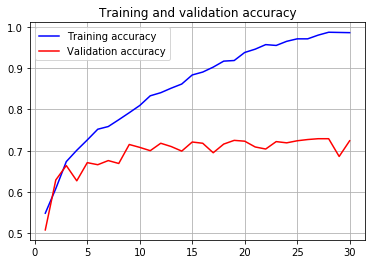

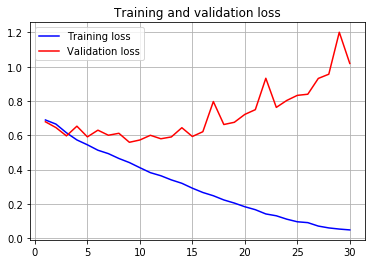

In [10]:
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(acc)) + 1

plt.figure('Accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure('Loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.grid()
plt.show()

'''
Model is overfitting after epoch 5.
Repeat training, but validation accuracy does not near 70%.
Validation loss linearly decrease after 5 iterations.

How to depress overfitting?
Use a data augmentaion.
'''